# IDEA
Men tend to use bikes with shorter time than women.


# NULL HYPOTHESIS
The mean of trip duration by women is longer than that by men.

H0: mean TripDuration men >= mean TripDuration women

H1: mean TripDuration men < mean TripDuration women


# Significant Level
a = 0.05

# Data
June 2016

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import json
import zipfile
import sys
import os

%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [2]:
def getCitiData(date):
    import requests
    import zipfile
    import StringIO
    zip_file_url = "https://s3.amazonaws.com/tripdata/" + date + "-citibike-tripdata.zip"
    r = requests.get(zip_file_url, stream=True)
    z = zipfile.ZipFile(StringIO.StringIO(r.content))
    z.extractall()

In [3]:
datelist = '201606'
getCitiData(datelist) 


In [4]:
#Include all the data into a list    
list1 = []
temp = pd.read_csv(datelist + "-citibike-tripdata.csv")
list1.append(temp)

In [5]:
df = pd.DataFrame()
for i in list1:
    df= df.append(i, ignore_index=True)

In [6]:
df.head(10)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1
5,946,6/1/2016 00:01:01,6/1/2016 00:16:48,503,E 20 St & Park Ave,40.738274,-73.987520,495,W 47 St & 10 Ave,40.762699,-73.993012,25193,Subscriber,1974.0,1
6,2351,6/1/2016 00:01:05,6/1/2016 00:40:16,533,Broadway & W 39 St,40.752996,-73.987216,386,Centre St & Worth St,40.714948,-74.002345,19538,Subscriber,1986.0,1
7,773,6/1/2016 00:01:24,6/1/2016 00:14:18,492,W 33 St & 7 Ave,40.750200,-73.990931,483,E 12 St & 3 Ave,40.732233,-73.988900,17101,Subscriber,1986.0,1
8,1929,6/1/2016 00:01:27,6/1/2016 00:33:37,525,W 34 St & 11 Ave,40.755942,-74.002116,306,Cliff St & Fulton St,40.708235,-74.005301,17802,Subscriber,1968.0,1
9,725,6/1/2016 00:01:38,6/1/2016 00:13:43,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,3083,Bushwick Ave & Powers St,40.712477,-73.941000,21421,Subscriber,1971.0,2


In [7]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [8]:
df = df.dropna()
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [9]:
df = df[['gender', 'tripduration']]
df = df[df != 0].dropna(axis = 0)
df.head(10)

,gender,tripduration
0,1.0,1470
1,1.0,229
2,1.0,344
3,1.0,1120
4,1.0,229
5,1.0,946
6,1.0,2351
7,1.0,773
8,1.0,1929
9,2.0,725


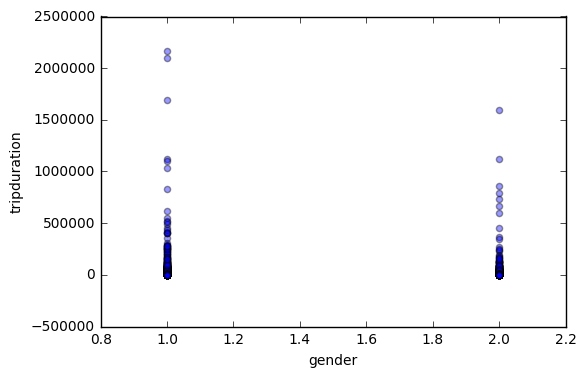

In [10]:
#In this csv file gender == 1 is male, gender == 2 is female
df.plot(kind='scatter',x='gender',y='tripduration', alpha = 0.4)
plt.show()

In [11]:
df['minute'] = df['tripduration'] / 60
df.head()


,gender,tripduration,minute
0,1.0,1470,24.500000
1,1.0,229,3.816667
2,1.0,344,5.733333
3,1.0,1120,18.666667
4,1.0,229,3.816667


In [12]:
df2 = df[['minute', 'gender']]
df2.head()

,minute,gender
0,24.500000,1.0
1,3.816667,1.0
2,5.733333,1.0
3,18.666667,1.0
4,3.816667,1.0


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7fc3a1396450>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc3a1385c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc3c1270f50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc3c1270910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc3a1396bd0>,
  <matplotlib.lines.Line2D at 0x7fc3a1385610>]}

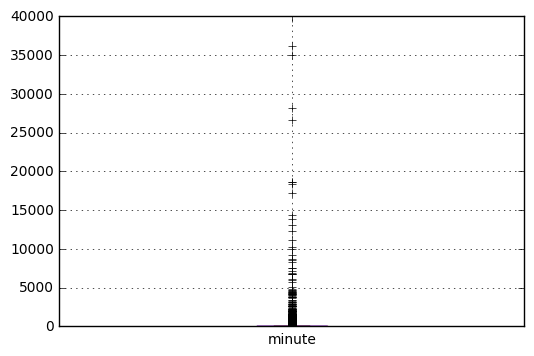

In [13]:
df2.boxplot(column="minute")

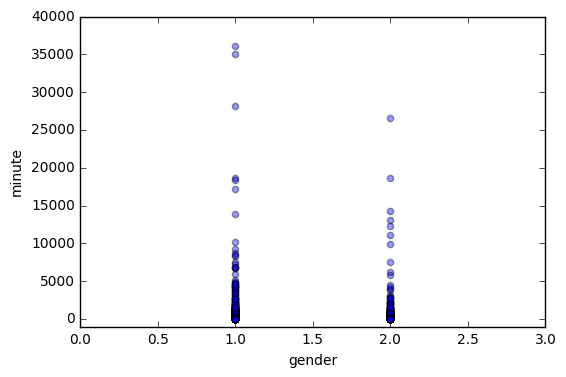

In [14]:
df2.plot(kind='scatter',x='gender',y='minute', alpha = 0.4)
plt.axis([0, 3, -1000, 40000])
plt.show()

In [15]:
mean1 = df2[df2['gender'] == 1].mean()
mean2 = df2[df2['gender'] == 2].mean()
mean2 > mean1

minute    True
gender    True
dtype: bool

In [16]:
from scipy.stats import ttest_ind
ttest_ind(df2[df2['gender'] == 1], df2[df2['gender'] == 2])

Ttest_indResult(statistic=array([-13.73147612,         -inf]), pvalue=array([  6.62493358e-43,   0.00000000e+00]))